<a href="https://colab.research.google.com/github/JonasCGN/project_neural_network/blob/main/project_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Visão Computacional: O Guia Completo - Redes Neurais para cliassificação de imagens


##Abordagem 1: extração de todos os pixels da imagem

###Importação das bibliotecas





In [ ]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow == 2.6.0

ERROR: Invalid requirement: '==': Expected package name at the start of dependency specifier
    ==
    ^


###Extração dos pixels das imagens





In [ ]:
path = '/content/drive/MyDrive/Visao_Computacional_Guia_Completo/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
diretorio = '/content/homer_bart_1'
arquivos = [os.path.join(diretorio,f) for f in sorted(os.listdir(diretorio))]
print(arquivos)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [ ]:
largura, altura = 128,128

In [ ]:
# arquivos.remove('/content/homer_bart_1/.DS_Store')
imagens = []
classes = []

for imagem_caminho in arquivos:
  try:
    imagem = cv2.imread(imagem_caminho)
    (H,W) = imagem.shape[:2]
  except:
    continue

  imagem = cv2.resize(imagem, (largura,altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  imagem = imagem.ravel()
  imagens.append(imagem)

  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
  bart = nome_imagem.startswith('b')
  classe = 1
  if (bart):
    classe = 0

  classes.append(classe)


In [ ]:
x = np.asarray(imagens)
y = np.asarray(classes)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

###Normalização dos dados





In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

###Bases de treinamento e teste





In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
x_treinamento.shape, y_treinamento.shape

((215, 16384), (215,))

###Construção e treinamento da rede neural





In [ ]:
(16384 + 2) / 2

8193.0

In [ ]:
# 16384 -> 8193
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
historico = network1.fit(x_treinamento, y_treinamento, epochs = 50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.4899 - loss: 123.5455
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4157 - loss: 41.0599
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5568 - loss: 4.6336
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5152 - loss: 1.1148
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6379 - loss: 0.6455
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5664 - loss: 0.6766
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6342 - loss: 0.6568
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6195 - loss: 0.6642
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5845 - loss: 0.6559
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6495 - loss: 0.6070
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6328 - loss: 0.6115
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6542 - loss: 0.59

###Avaliação da rede neural





In [ ]:
historico.history.keys()

dict_keys(['accuracy', 'loss'])

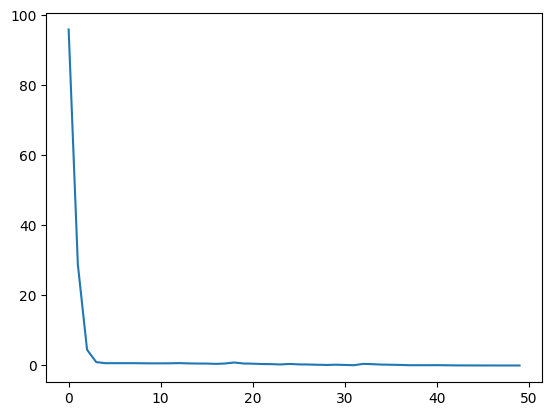

In [ ]:
plt.plot(historico.history['loss']);

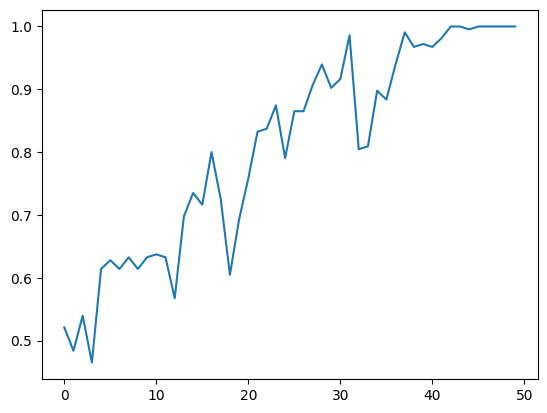

In [ ]:
plt.plot(historico.history['accuracy']);

In [ ]:
x_teste.shape

(54, 16384)

In [ ]:
previsoes = network1.predict(x_teste)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


In [ ]:
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.7037037037037037

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste,previsoes)
cm

array([[21,  7],
       [ 9, 17]])

<Axes: >

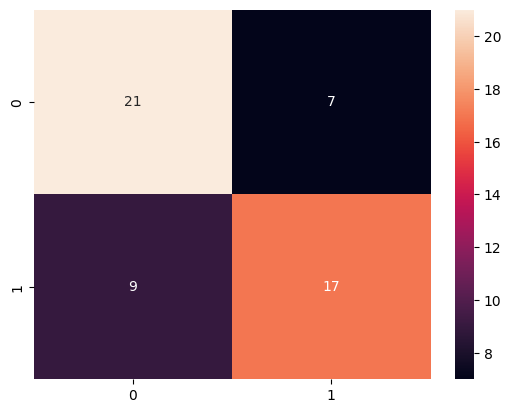

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        28
           1       0.71      0.65      0.68        26

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.70      0.70      0.70        54



###Salvar e carregar a rede neural

####Salvando a rede neural

In [ ]:
model_json = network1.to_json()
with open('network1.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5')

####Carregando rede neural

In [ ]:
with open('network1.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_6", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 16384], "dtype": "float32", "sparse": false, "name": "input_layer_3"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_c

In [ ]:
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('/content/weights1.hdf5')
network1.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
network1_loaded.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 604,151,825 (2.25 GB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 402,767,884 (1.50 GB)

###Classificação de uma única imagem

In [ ]:
x_teste[0], y_teste[0]

(array([1., 1., 1., ..., 1., 1., 1.]), 0)

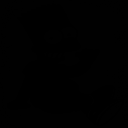

In [ ]:
cv2_imshow(x_teste[0].reshape(128,128))

In [ ]:
imagem_teste = x_teste[34]
imagem_teste = scaler.inverse_transform(imagem_teste.reshape(1,-1))

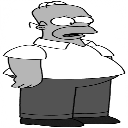

In [ ]:
cv2_imshow(imagem_teste.reshape(128,128))

In [ ]:
network1_loaded.predict(imagem_teste)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


1.0

In [ ]:
if network1_loaded.predict(imagem_teste)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Homer



#Extracao de Caracteristica

##Extrator de Caracteristicas

In [ ]:
arquivos = [os.path.join(diretorio,f) for f in sorted(os.listdir(diretorio))]
print(arquivos)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [50]:
export = 'boca,calca,sapatos,camisa,calcao,tenis,class\n'

In [51]:
mostrar_imagens = False
caracteristicas = []

In [52]:
for imagem_caminho in arquivos:
  try:
    imagem_original = cv2.imread(imagem_caminho)
    (h,w) = imagem_original.shape[:2]
  except:
    continue
  imagem_alterada = imagem_original.copy()
  imagem_caracteristicas = []
  imagem_nome = os.path.basename(os.path.normpath(imagem_caminho))
  boca = calca = sapato = 0
  camisa = calcao = tenis = 0

  if imagem_nome.startswith('b'):
    classe = 0
  else:
    classe = 1

  for altura in range(0,h):
    for largura in range(0,w):
      azul = imagem_alterada.item(altura,largura,0)
      verde = imagem_alterada.item(altura,largura,1)
      vermelho = imagem_alterada.item(altura,largura,2)

      # Homer - Boca
      if(azul >= 95 and azul <= 140 and verde >= 160 and verde <= 185 and vermelho >= 175 and vermelho <= 205):
        imagem_alterada[altura, largura] = [0,255,255]
        boca += 1

      # Homer - Calca
      if(azul >= 150 and azul <= 180 and verde >= 98 and verde <= 120 and vermelho >= 0 and vermelho <= 90):
        imagem_alterada[altura, largura] = [255,0,255]
        calca += 1

      # Homer - Sapato
      if altura > (h / 2):
        if(azul >= 25 and azul <= 45 and verde >= 25 and verde <= 45 and vermelho >= 25 and vermelho <= 45):
          imagem_alterada[altura, largura] = [255,255,0]
          sapato += 1

      # Bart - Camisa
      if(azul >= 11 and azul <= 22 and verde >= 85 and verde <= 105 and vermelho >= 240 and vermelho <= 255):
        imagem_alterada[altura, largura] = [0,255,128]
        camisa += 1

      # Bart - Calcao
      if(azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
        imagem_alterada[altura, largura] = [128,0,255]
        calcao += 1

      # Bart - Tenis
      if altura > (h / 2):
        if(azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
          imagem_alterada[altura, largura] = [255,128,0]
          tenis += 1

  boca = round((boca / (h*w)) * 100, 9)
  calca = round((calca / (h*w)) * 100, 9)
  sapato = round((sapato / (h*w)) * 100, 9)

  camisa = round((camisa / (h*w)) * 100, 9)
  calcao = round((calcao / (h*w)) * 100, 9)
  tenis = round((tenis / (h*w)) * 100, 9)

  imagem_caracteristicas.append(boca)
  imagem_caracteristicas.append(calca)
  imagem_caracteristicas.append(sapato)

  imagem_caracteristicas.append(camisa)
  imagem_caracteristicas.append(calcao)
  imagem_caracteristicas.append(tenis)
  imagem_caracteristicas.append(classe)


  caracteristicas.append(imagem_caracteristicas)

  # print('Homer boca: ', imagem_caracteristicas[0],'Homer Calca: ', imagem_caracteristicas[1],'Homer Sapato: ', imagem_caracteristicas[2])
  # print('Bart camisa: ', imagem_caracteristicas[3],'Bart calcao: ', imagem_caracteristicas[4],'Bart tenis: ', imagem_caracteristicas[5])

  f = (','.join([str(item) for item in imagem_caracteristicas]))
  export += f + '\n'

  if mostrar_imagens:
    imagem_alterada = cv2.cvtColor(imagem_alterada, cv2.COLOR_BGR2RGB)
    imagem_original = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)
    figura, im = plt.subplots(1,2)
    im[0].imshow(imagem_original)
    im[0].axis('off')
    im[1].imshow(imagem_alterada)
    im[1].axis('off')

    plt.show()


In [53]:
export

'boca,calca,sapatos,camisa,calcao,tenis,class\n0.0,0.0,0.114799225,6.886101887,3.495204355,3.495204355,0\n0.0,0.0,0.11007847,5.004901113,3.183888705,3.183888705,0\n0.0,0.0,0.182518631,5.264620437,5.029682961,5.029682961,0\n0.0,0.480168257,0.080028043,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,3.459119497,3.459119497,0\n0.0,0.0,0.053304904,6.75432362,0.948827292,0.948827292,0\n0.249585206,0.0,0.019853369,9.693407263,4.104683977,4.104683977,0\n0.0,0.0,0.181208054,0.0,0.0,0.0,0\n0.0,0.0,0.148868778,0.0,0.0,0.0,0\n0.0,0.0,0.114762211,9.594752524,7.522715548,7.522715548,0\n0.0,0.0,0.138655462,0.0,0.0,0.0,0\n0.0,0.0,0.02400947,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.0,0.0,0.032184591,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.008503918,8.915750471,0.0,0.0,0\n0.0,0.0,0.081055114,11.095816228,4.525111363,4.525111363,0\n0.0,0.0,0.08757526,10.443349754,3.183296307,3.183296307,0\n0.0,0.0,0.043806812,9.49740809

In [54]:
with open('features.csv', 'w') as file:
  for linha in export:
    file.write(linha)
file.closed

True

In [55]:
dataset = pd.read_csv('features.csv')
dataset

,boca,calca,sapatos,camisa,calcao,tenis,class
0,0.000000,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.000000,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.000000,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.000000,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.029708,8.978929,3.459119,3.459119,0
...,...,...,...,...,...,...,...
264,6.485412,0.000000,0.171985,0.000000,0.000000,0.000000,1
265,0.000000,0.000000,0.161637,0.000000,0.000000,0.000000,1
266,4.264975,0.000000,0.329940,0.000000,0.000000,0.000000,1
267,1.429133,0.000000,0.034559,0.000000,0.000000,0.000000,1


##Bases de treinamento e teste

In [56]:
x = dataset.iloc[:, 0:6].values
x

array([[ 0.        ,  0.        ,  0.11479923,  6.88610189,  3.49520435,
         3.49520435],
       [ 0.        ,  0.        ,  0.11007847,  5.00490111,  3.18388871,
         3.18388871],
       [ 0.        ,  0.        ,  0.18251863,  5.26462044,  5.02968296,
         5.02968296],
       ...,
       [ 4.26497522,  0.        ,  0.32993967,  0.        ,  0.        ,
         0.        ],
       [ 1.42913348,  0.        ,  0.03455866,  0.        ,  0.        ,
         0.        ],
       [ 0.853902  , 13.74424774,  0.16177802,  0.        ,  0.        ,
         0.        ]])

In [57]:
y = dataset.iloc[:, 6].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [60]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y, test_size=0.2,random_state=1)

In [61]:
x_treinamento.shape, y_treinamento.shape

((215, 6), (215,))

In [62]:
x_teste.shape, y_teste.shape

((54, 6), (54,))

##Construcao e treinamento da rede neural

In [63]:
network2 = tf.keras.Sequential()
network2.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
network2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
network2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
historico = network2.fit(x_treinamento, y_treinamento, epochs=50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6907 - loss: 0.6857
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6284 - loss: 0.6610 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.6270 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.5905 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7701 - loss: 0.5774 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.5582 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.5768 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7566 - loss: 0.5766 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.5142 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.5303 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.5428 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 0.5080 


##Avalicao da rede neural

In [67]:
historico.history.keys()

dict_keys(['accuracy', 'loss'])

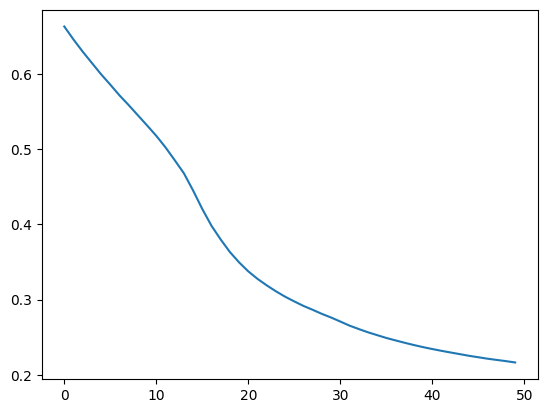

In [68]:
plt.plot(historico.history['loss'])

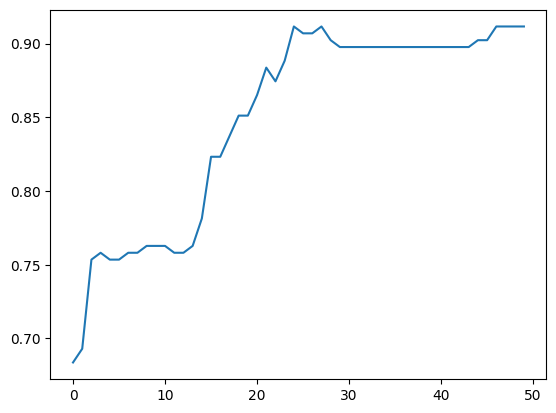

In [69]:
plt.plot(historico.history['accuracy'])

In [81]:
previsoes = network2(x_teste)
previsoes

<tf.Tensor: shape=(54, 1), dtype=float32, numpy=
array([[4.0037932e-07],
       [9.6338040e-01],
       [7.5837625e-03],
       [3.9629701e-01],
       [1.1973665e-02],
       [9.7750825e-01],
       [1.4854154e-08],
       [1.0384561e-02],
       [1.0124481e-03],
       [2.2804628e-03],
       [1.2814788e-02],
       [9.9869126e-01],
       [7.6048547e-01],
       [1.0684753e-05],
       [4.0958777e-01],
       [9.9869978e-01],
       [6.6926658e-01],
       [9.7403049e-01],
       [3.7482116e-01],
       [1.4620814e-03],
       [5.2041033e-17],
       [9.9221593e-01],
       [8.3942842e-01],
       [3.4404866e-04],
       [1.2529243e-07],
       [9.9681193e-01],
       [4.0971965e-01],
       [3.8830665e-04],
       [9.5384771e-01],
       [9.9982846e-01],
       [8.3609599e-01],
       [9.9999928e-01],
       [9.9883038e-01],
       [5.1681614e-01],
       [9.9997520e-01],
       [8.3763319e-01],
       [3.2911941e-03],
       [2.1732366e-03],
       [4.0363005e-01],
       [1.55497

In [82]:
previsoes = previsoes > 0.5
previsoes

<tf.Tensor: shape=(54, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])>

In [83]:
y_teste

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.9444444444444444

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)

<Axes: >

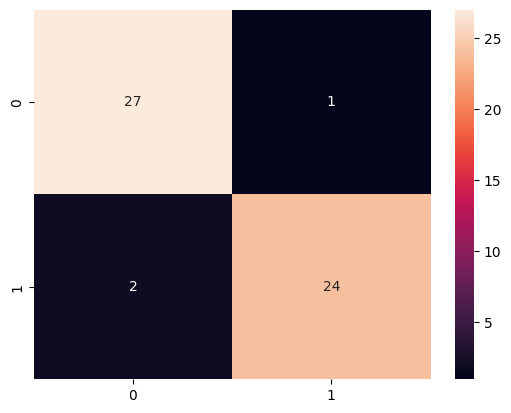

In [86]:
sns.heatmap(cm, annot=True)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.96      0.92      0.94        26

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54



#Salvar, carregar e classificar uma unica imagem

###Salvando rede neural

In [89]:
model_json = network2.to_json()
with open('network2.json', 'w') as json_file:
  json_file.write(model_json)

In [90]:
from keras.models import save_model
network2_saved = save_model(network2, '/content/weights1.hdf5')

####Carregando rede neural

In [91]:
0with open('network2.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 6], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": n

In [92]:
network2_loaded = tf.keras.models.model_from_json(json_saved_model)
network2_loaded.load_weights('/content/weights1.hdf5')
network2.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [93]:
network2_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (888.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148 (596.00 B)

###Classificação de uma única imagem

In [94]:
x_teste[0], y_teste[0]

(array([3.07645000e-03, 0.00000000e+00, 0.00000000e+00, 6.49515459e+00,
        5.59913859e+00, 5.59913859e+00]),
 0)

In [102]:
imagem_teste = x_teste[0]
imagem_teste

array([3.07645000e-03, 0.00000000e+00, 0.00000000e+00, 6.49515459e+00,
       5.59913859e+00, 5.59913859e+00])

In [103]:
imagem_teste = imagem_teste.reshape(1,-1)
imagem_teste.shape

(1, 6)

In [104]:
network2_loaded.predict(imagem_teste)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


4.0037932e-07

In [105]:
if network2_loaded.predict(imagem_teste)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Bart
